### Step 1: Load and preview the data

In [34]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#Load the CSV file
df = pd.read_csv(r"D:/Projects/career-counsellor-ml/data/raw/cs_students.csv")

In [3]:
#Show the shape and top 5 rows
print("Shape of the dataset : ", df.shape)
df.head()

Shape of the dataset :  (180, 12)


,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


### Step 2: Understand the columns

In [4]:
#Understanding the data types of columns and its properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         180 non-null    int64  
 1   Name               180 non-null    object 
 2   Gender             180 non-null    object 
 3   Age                180 non-null    int64  
 4   GPA                180 non-null    float64
 5   Major              180 non-null    object 
 6   Interested Domain  180 non-null    object 
 7   Projects           180 non-null    object 
 8   Future Career      180 non-null    object 
 9   Python             180 non-null    object 
 10  SQL                180 non-null    object 
 11  Java               180 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 17.0+ KB


In [5]:
#Understand a few statistics of the dataset
df.describe(include = "all")

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
count,180.000000,180,180,180.000000,180.000000,180,180,180,180,180,180,180
unique,NaN,89,2,NaN,NaN,1,27,65,33,3,3,3
top,NaN,James Wilson,Male,NaN,NaN,Computer Science,Artificial Intelligence,Natural Language Processing,Web Developer,Strong,Strong,Strong
freq,NaN,8,102,NaN,NaN,180,19,14,19,70,79,69
mean,90.500000,NaN,NaN,22.116667,3.615000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,52.105662,NaN,NaN,2.823040,0.177341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,45.750000,NaN,NaN,21.000000,3.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,90.500000,NaN,NaN,22.000000,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,135.250000,NaN,NaN,22.250000,3.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Value counts for 'Student ID':
Student ID
1      1
114    1
116    1
117    1
118    1
      ..
62     1
63     1
64     1
65     1
180    1
Name: count, Length: 180, dtype: int64

Value counts for 'Name':
Name
James Wilson         8
Olivia Clark         7
Sophia Johnson       6
Michael Brown        6
Laura Lee            6
                    ..
Agent Simmons        1
Agent Fitz           1
Agent Mack           1
Agent Bobbi Morse    1
Morbius              1
Name: count, Length: 89, dtype: int64

Value counts for 'Gender':
Gender
Male      102
Female     78
Name: count, dtype: int64


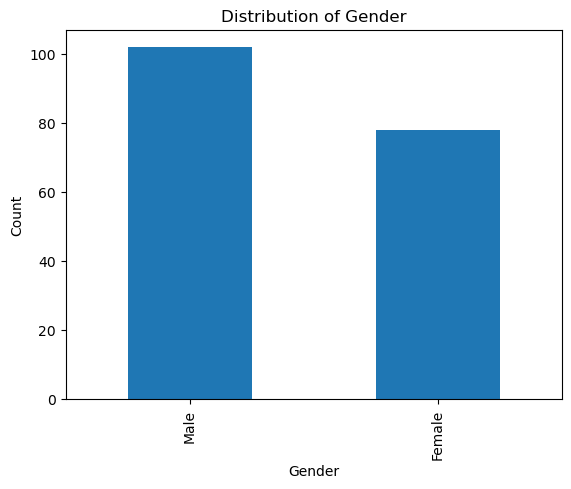


Value counts for 'Age':
Age
22    53
21    48
23    36
20    34
35     2
33     2
37     2
29     2
31     1
Name: count, dtype: int64


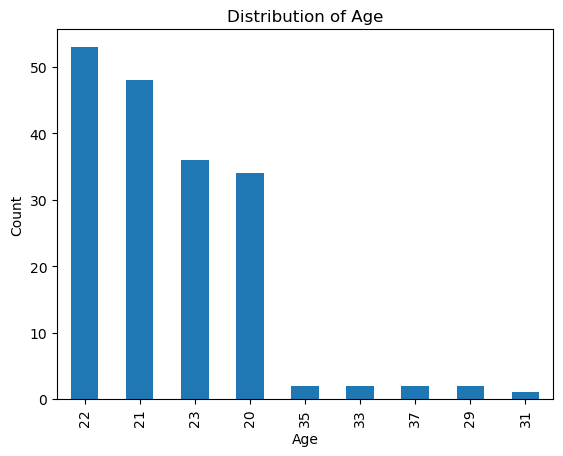


Value counts for 'GPA':
GPA
3.7    44
3.5    33
3.8    31
3.6    29
3.3    21
3.9    13
3.4     7
3.2     2
Name: count, dtype: int64


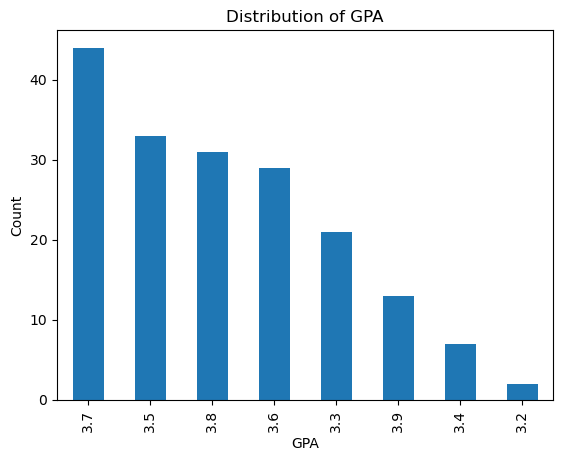


Value counts for 'Major':
Major
Computer Science    180
Name: count, dtype: int64


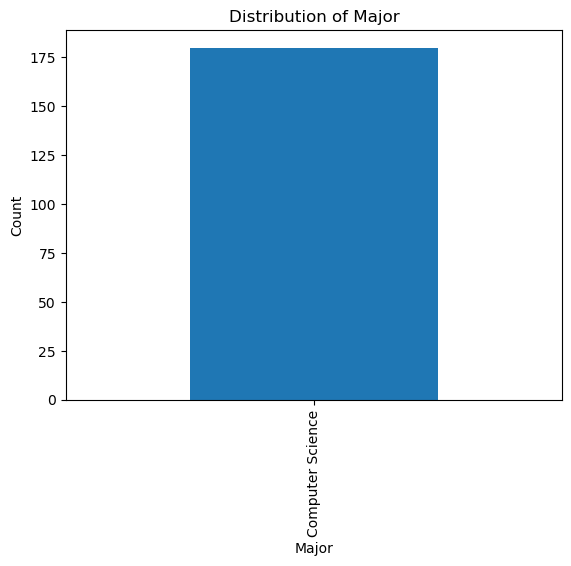


Value counts for 'Interested Domain':
Interested Domain
Artificial Intelligence           19
Web Development                   19
Cybersecurity                     18
Mobile App Development            17
Database Management               16
Cloud Computing                   16
Data Science                      13
Machine Learning                  13
Computer Graphics                 13
Software Development              11
Software Engineering               5
Quantum Computing                  2
Bioinformatics                     2
Human-Computer Interaction         2
Biomedical Computing               2
Distributed Systems                1
Geographic Information Systems     1
Data Privacy                       1
Information Retrieval              1
Blockchain Technology              1
Computer Vision                    1
Data Mining                        1
Natural Language Processing        1
IoT (Internet of Things)           1
Game Development                   1
Network Security  

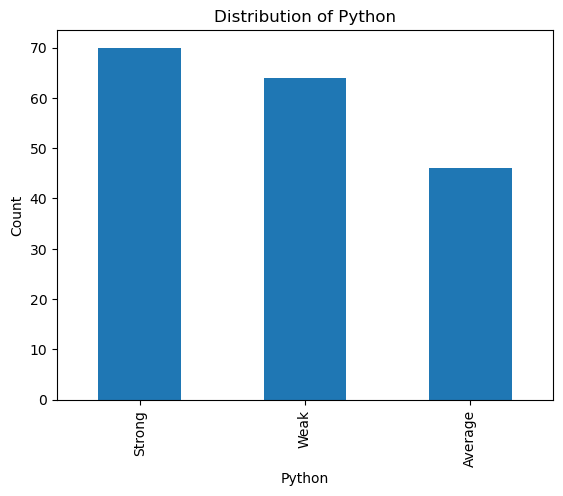


Value counts for 'SQL':
SQL
Strong     79
Average    60
Weak       41
Name: count, dtype: int64


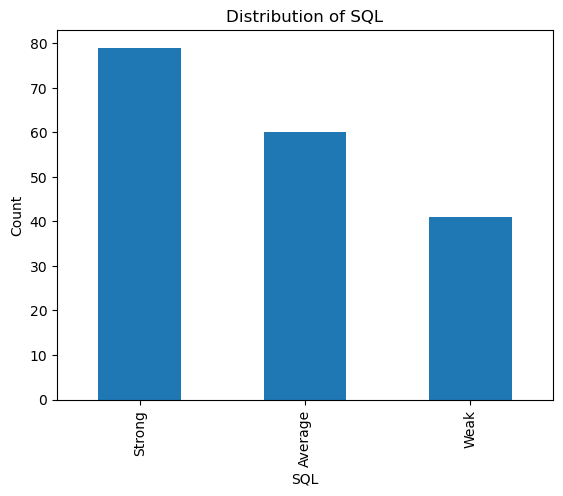


Value counts for 'Java':
Java
Strong     69
Weak       64
Average    47
Name: count, dtype: int64


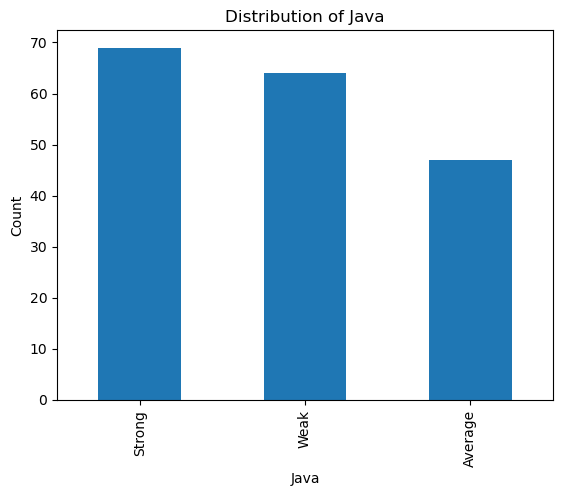

In [6]:
#Studying each column and the count of different vlaues to get a feel of the data distribution
for col in df.columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())

    if df[col].nunique() < 20:  # Plot only if there are fewer than 20 unique values
        df[col].value_counts().plot(kind='bar', title=f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()


### Step 3: Check for missing values

In [7]:
df.isnull().sum()

Student ID           0
Name                 0
Gender               0
Age                  0
GPA                  0
Major                0
Interested Domain    0
Projects             0
Future Career        0
Python               0
SQL                  0
Java                 0
dtype: int64

Up untill here, the dataset has been loaded and an initial analysis has been done to get a general idea of the dataset. Now lets gather insights from the data.

### Step 4: Initial Visualizations

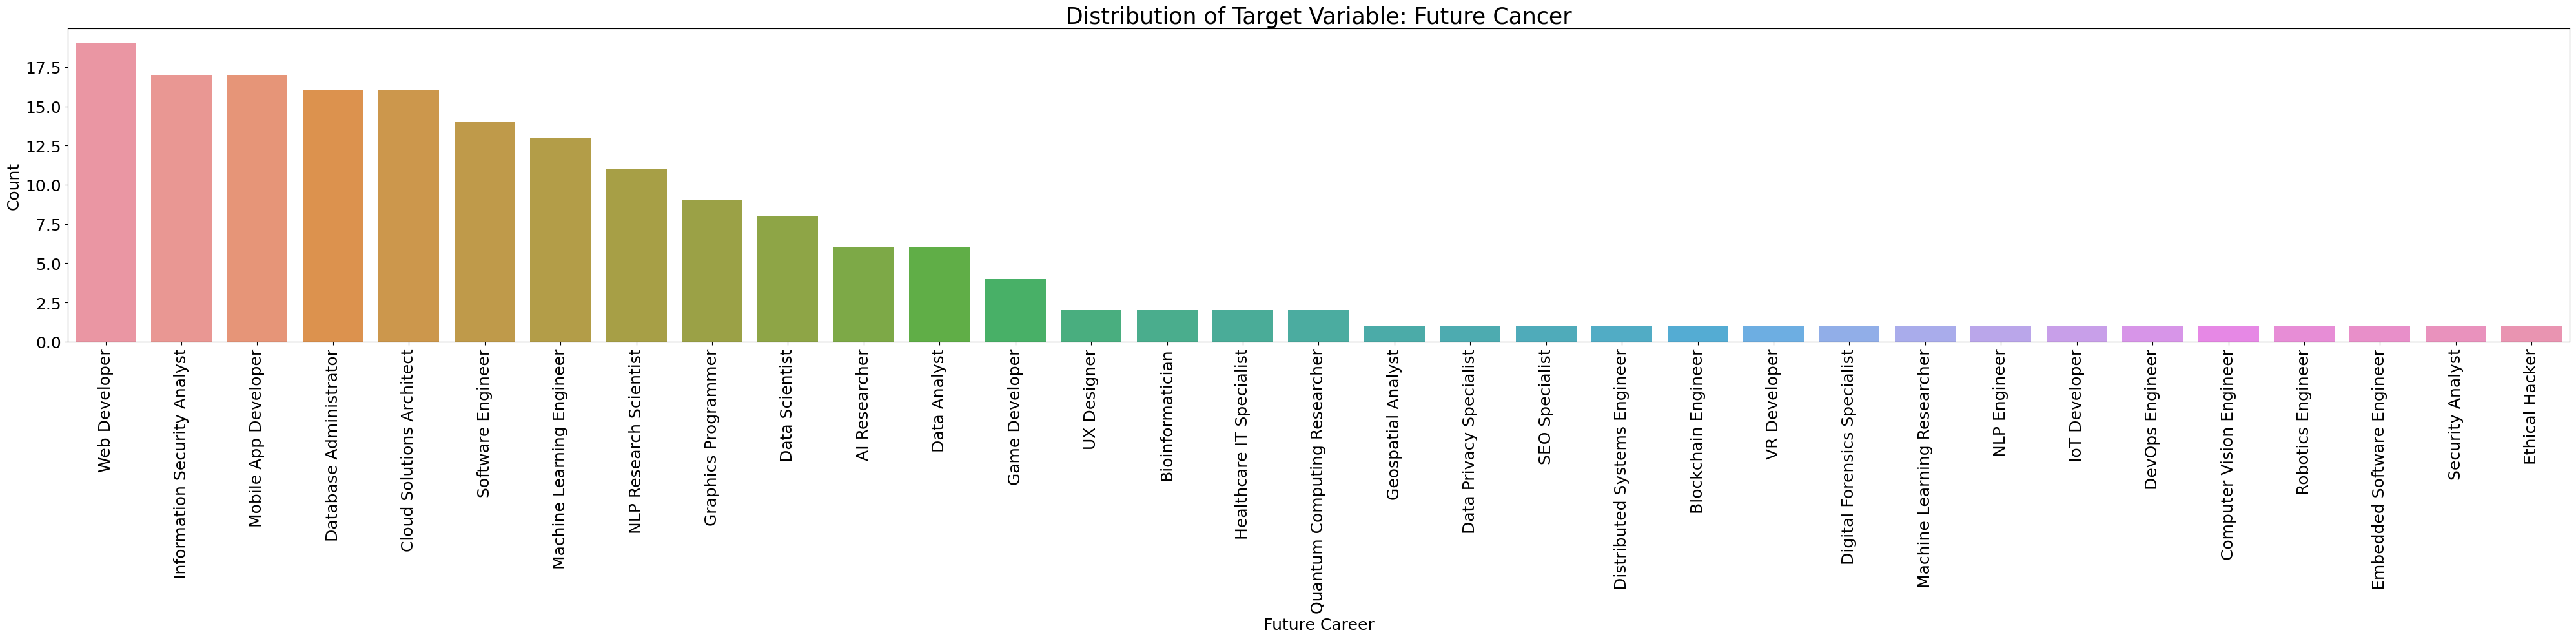

In [8]:
#Plotting the target variable(Future Career)
plt.figure(figsize=(40,10))

#Matplotlib Implementation
#df['Future Career'].value_counts().plot(kind='bar')

#Seaborn Implementation
sns.countplot(data=df, x='Future Career', order=df['Future Career'].value_counts().index)

plt.title("Distribution of Target Variable: Future Cancer", fontsize=25)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Future Career',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.tight_layout()
plt.show()

Looking at the above graph, it is clearly visible that there is class imbalance, especially for the last majority of careers. Need to take care of this using balancing techniques/ sampling methods.

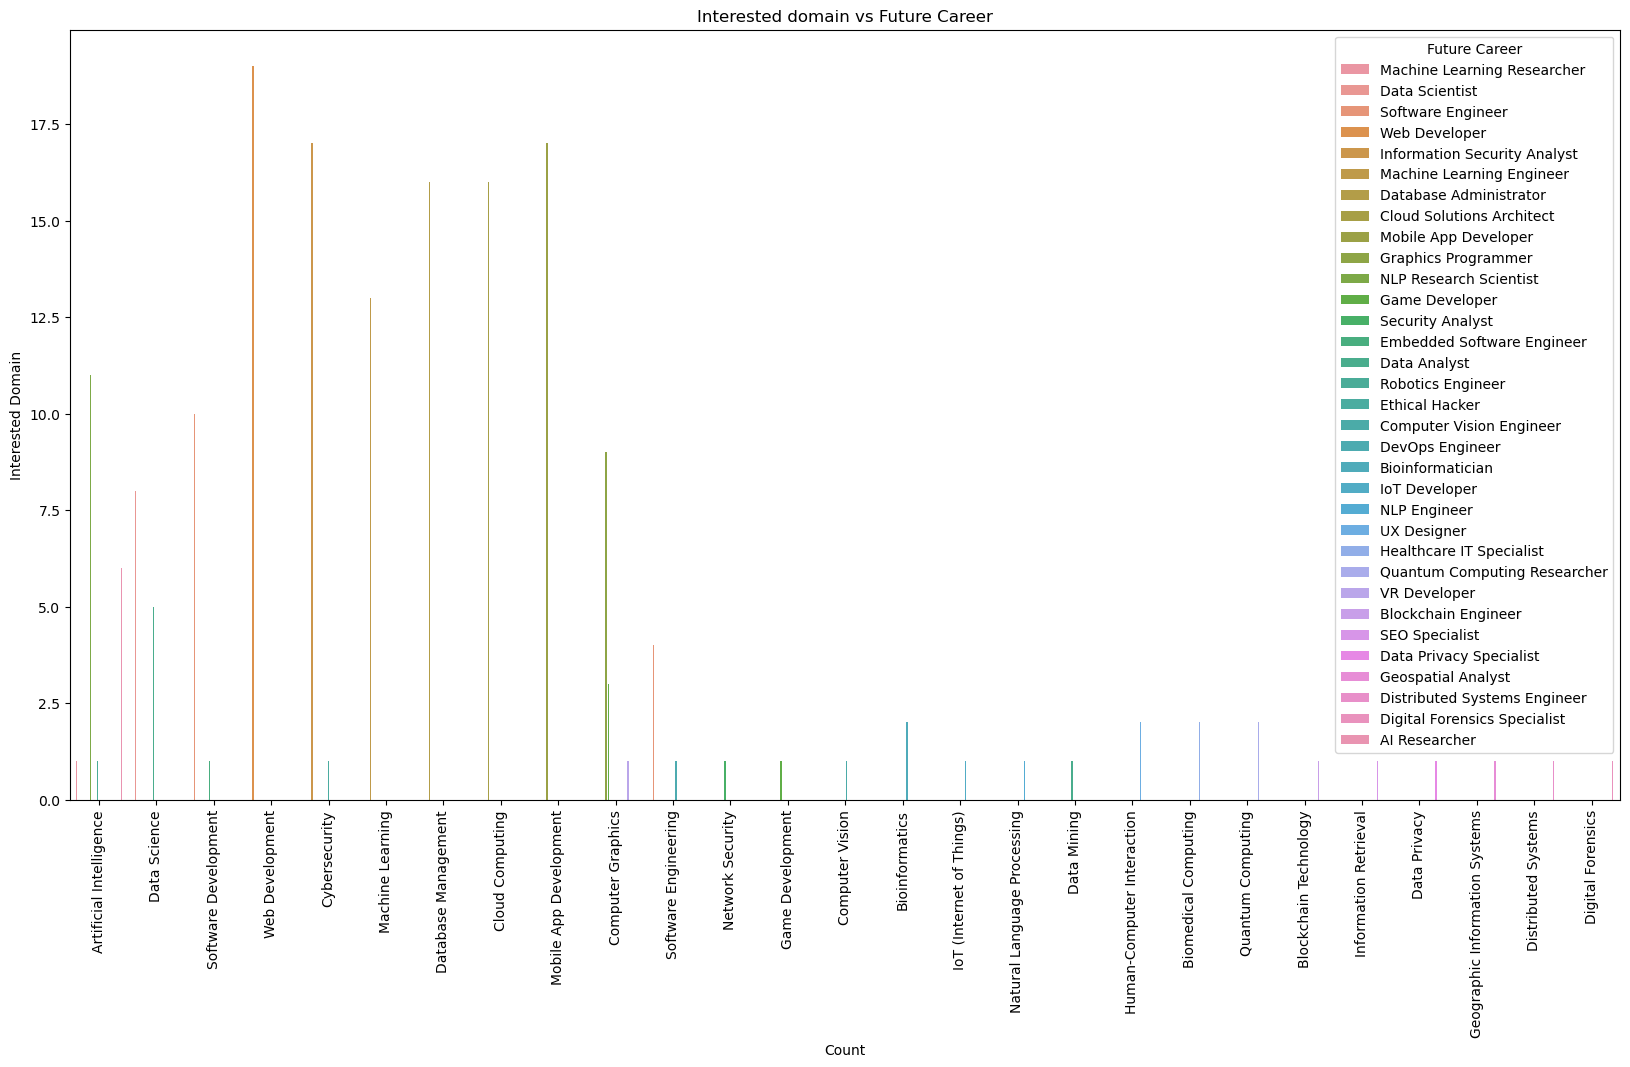

In [9]:
#Interested domain vs Future career
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='Interested Domain', hue='Future Career')
plt.title("Interested domain vs Future Career")
plt.xticks(rotation=90)
plt.xlabel('Count')
plt.ylabel('Interested Domain')
plt.show()

While experimenting and plotting a countplot, I am not able to derive much insights as there are so many categories with very similar colors (the thin lines sre also causing problems). While researching, came across a pivot table + heatmap combination which works wonders when you want to create a "VS" graph with a variety of categories (10+ categories)

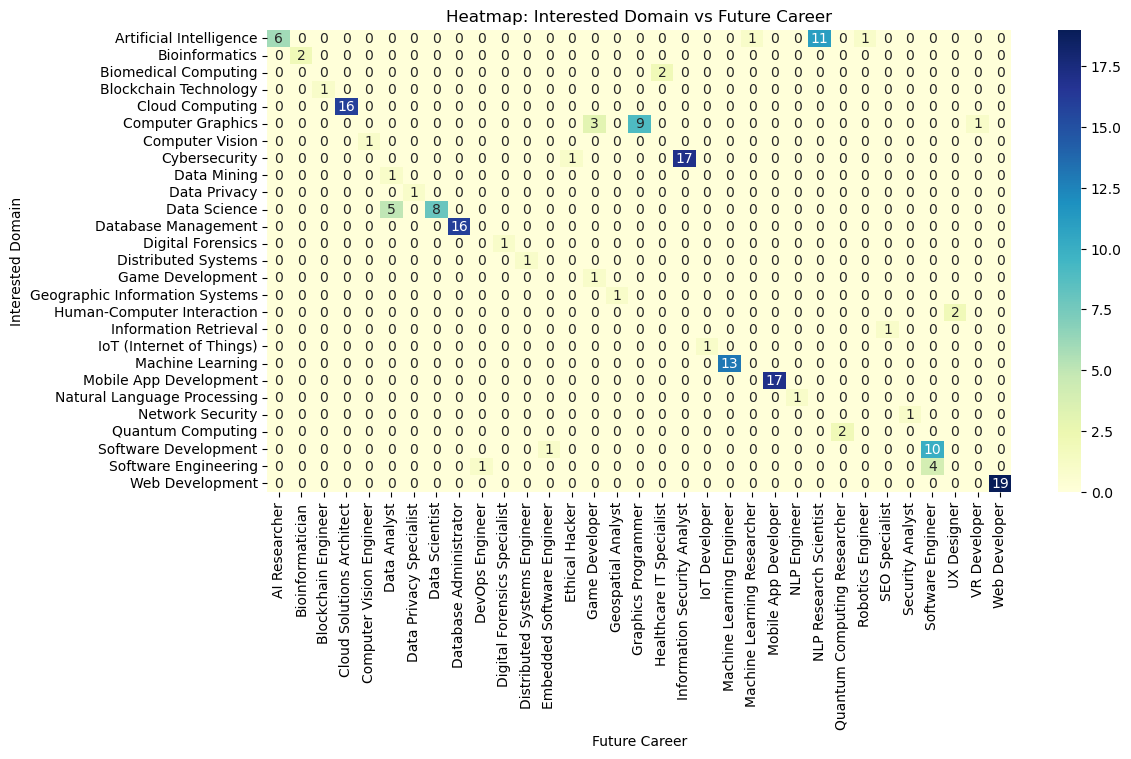

In [10]:
pivot_table = df.pivot_table(index='Interested Domain', columns='Future Career', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Interested Domain vs Future Career')
plt.xlabel('Future Career')
plt.ylabel('Interested Domain')
plt.show()


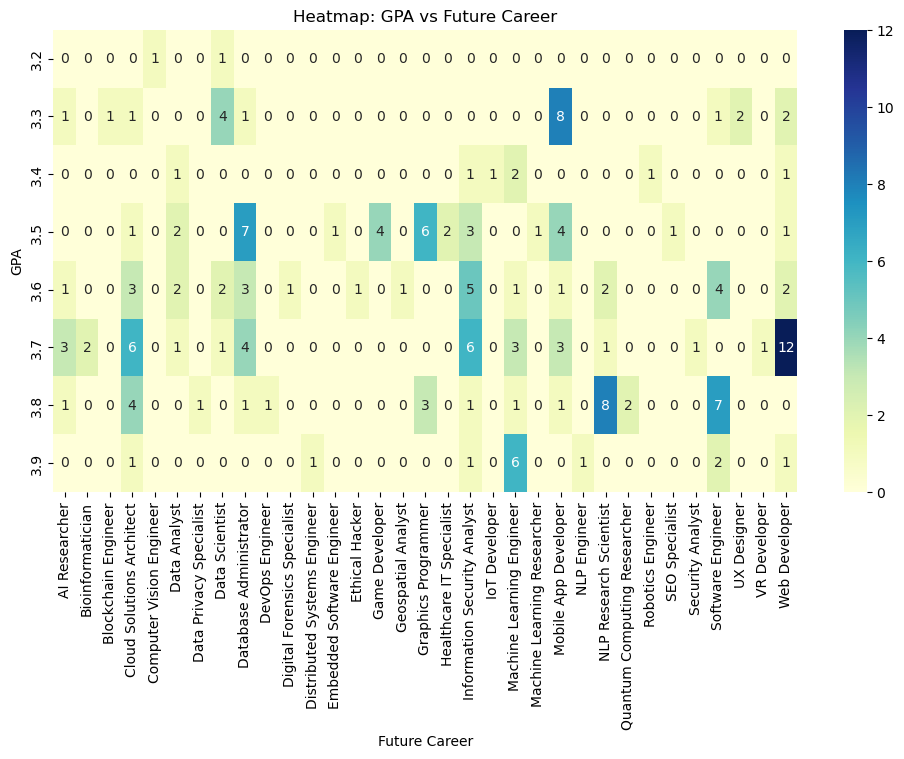

In [11]:
pivot_table = df.pivot_table(index='GPA', columns='Future Career', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: GPA vs Future Career')
plt.xlabel('Future Career')
plt.ylabel('GPA')
plt.show()

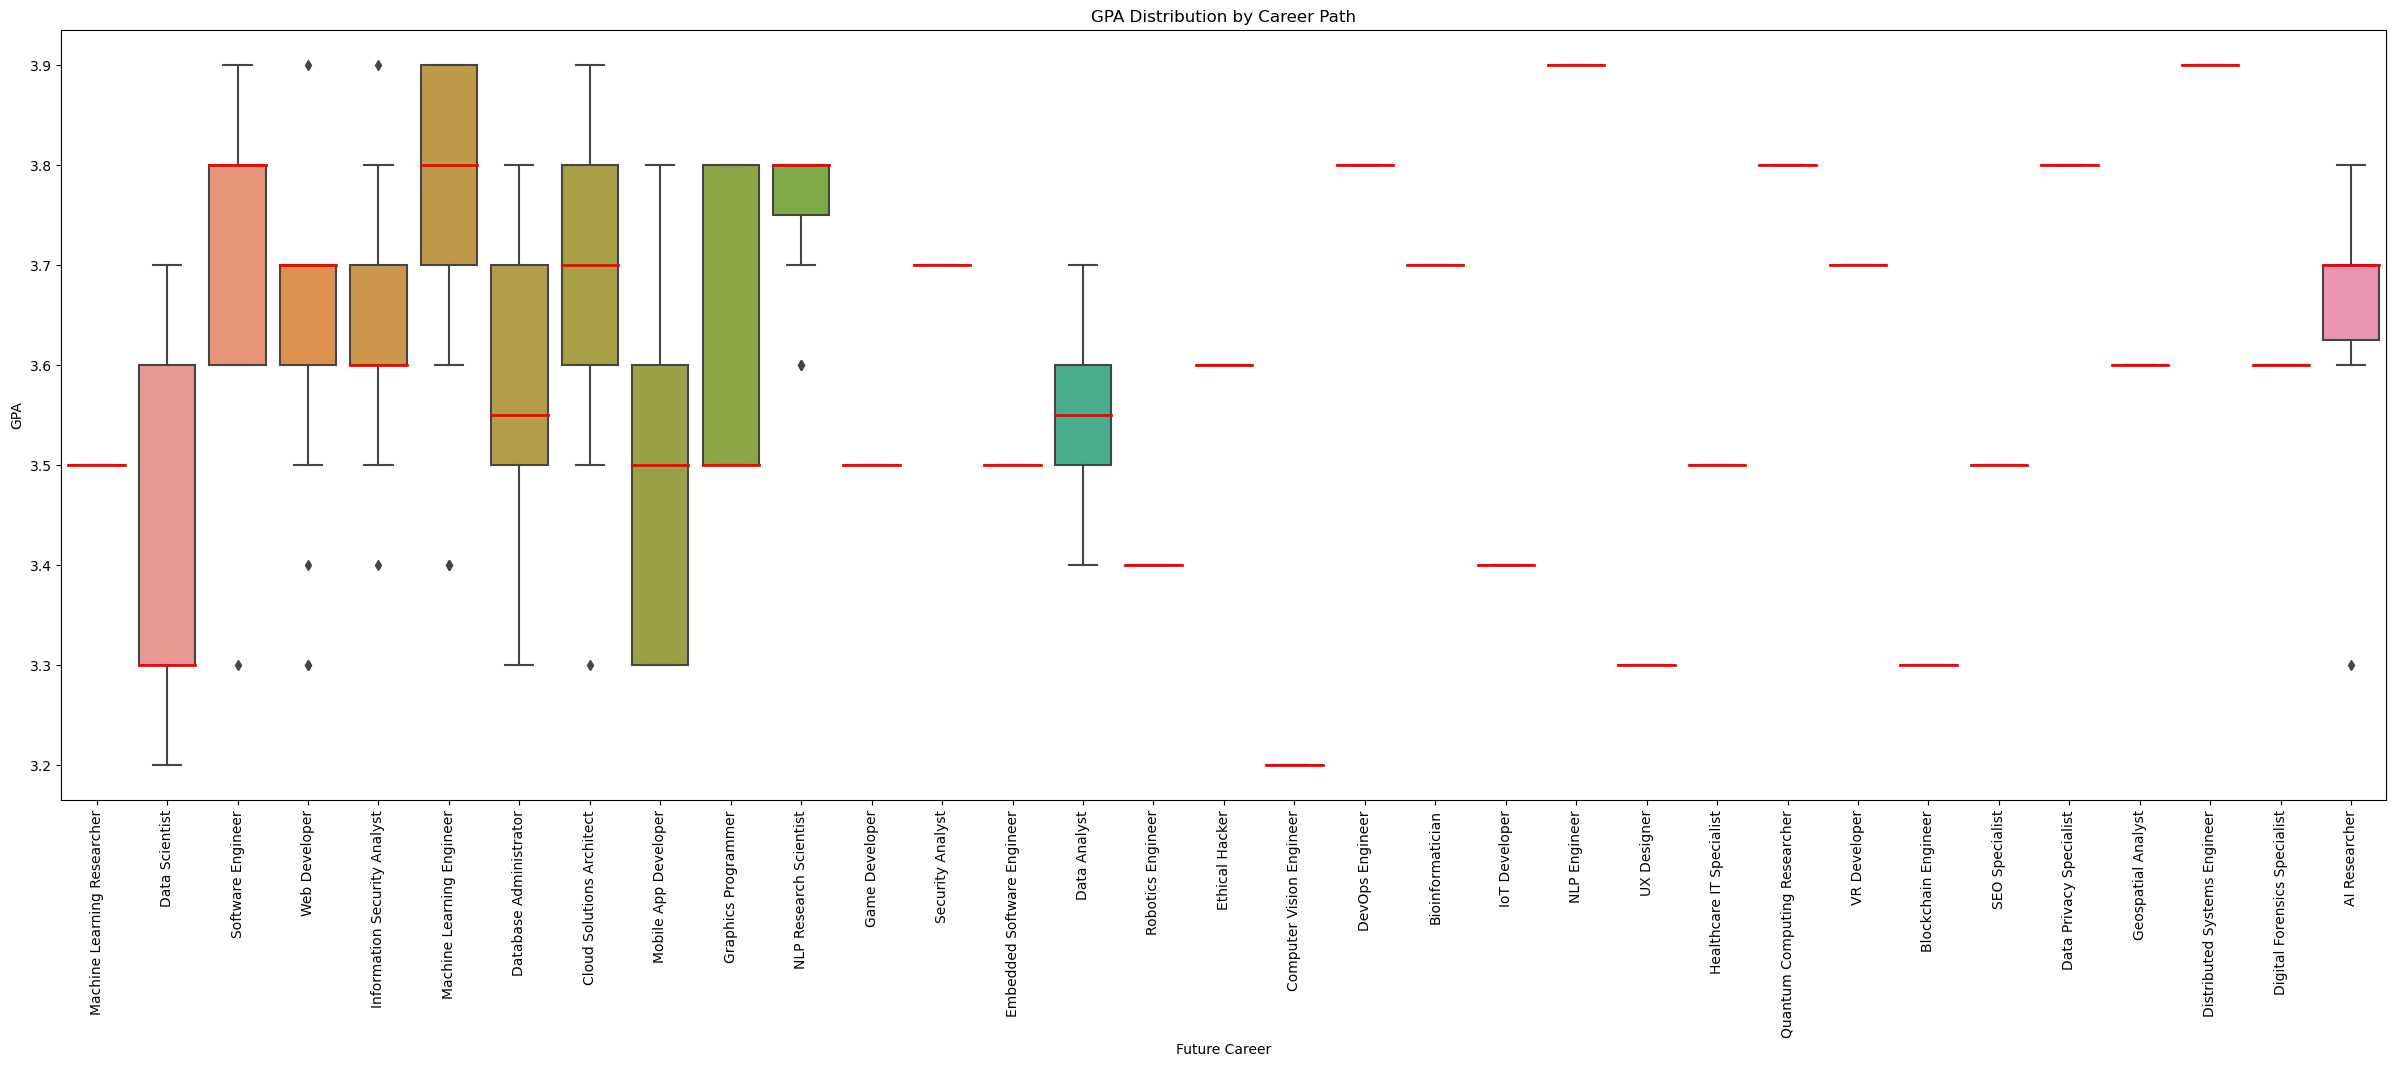

In [12]:
plt.figure(figsize=(30,10))
sns.boxplot(x='Future Career', y='GPA', data=df, medianprops=dict(color='red', linewidth=2))
plt.title('GPA Distribution by Career Path')
plt.xticks(rotation=90)
plt.show()

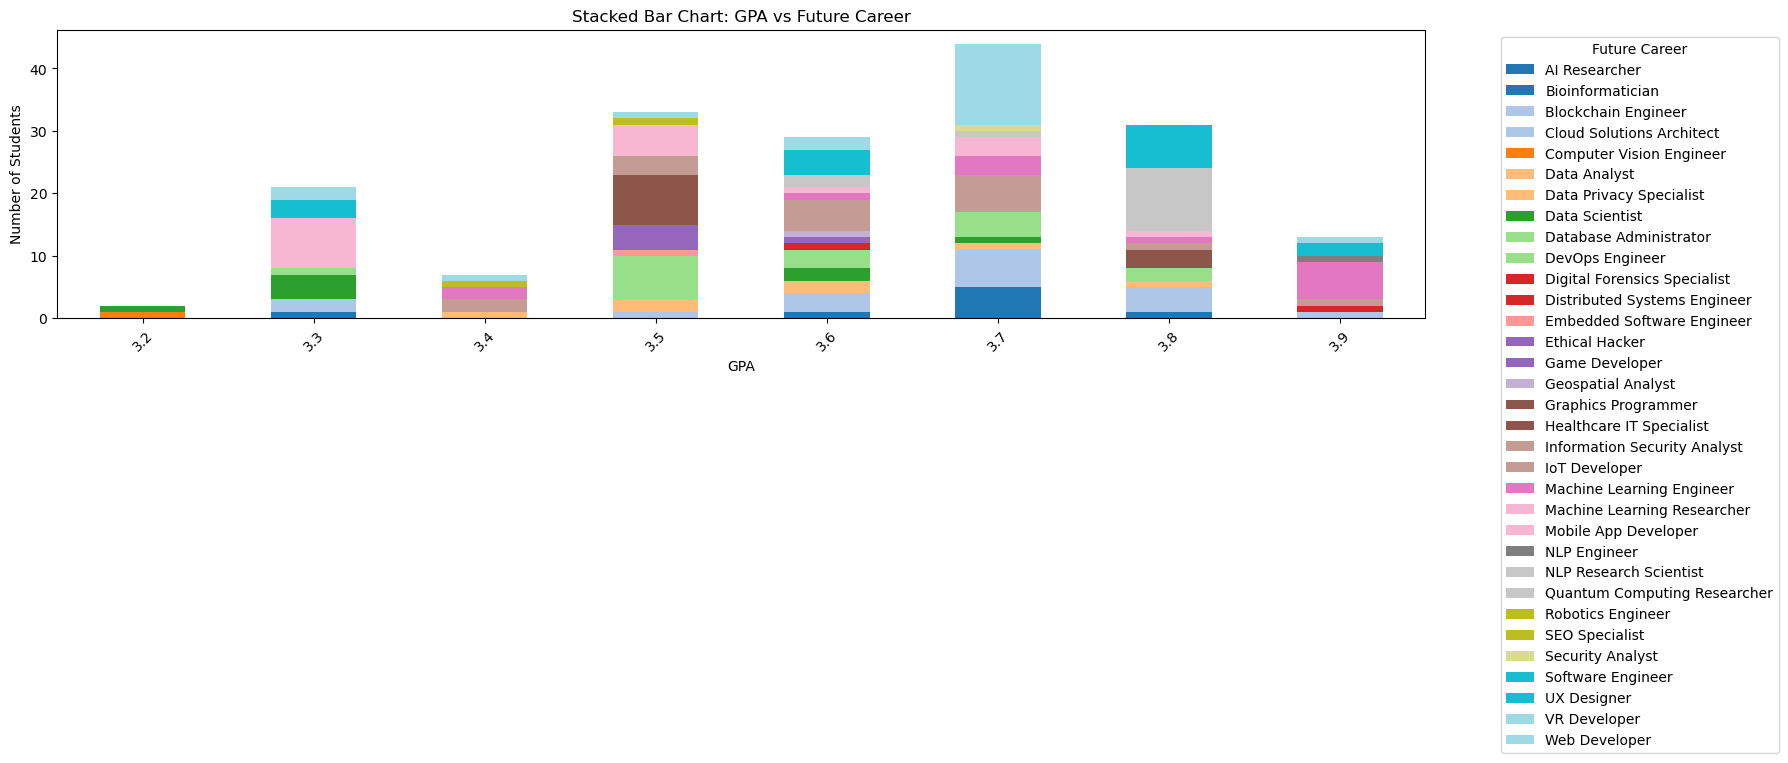

In [13]:
# Group by GPA and Future Career, then reshape
gpa_career = df.groupby(['GPA','Future Career']).size().unstack(fill_value=0)

# Plot the stacked bar chart
gpa_career.plot(kind='bar', stacked=True, figsize=(18, 6), colormap='tab20')
plt.title('Stacked Bar Chart: GPA vs Future Career')
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Future Career', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

I just wanted to try out a stacked bar graph, but as is visible, due to a lot of categories and the colors being very similar, the graph becomes a bit cluttered and gathering insights is not possible.

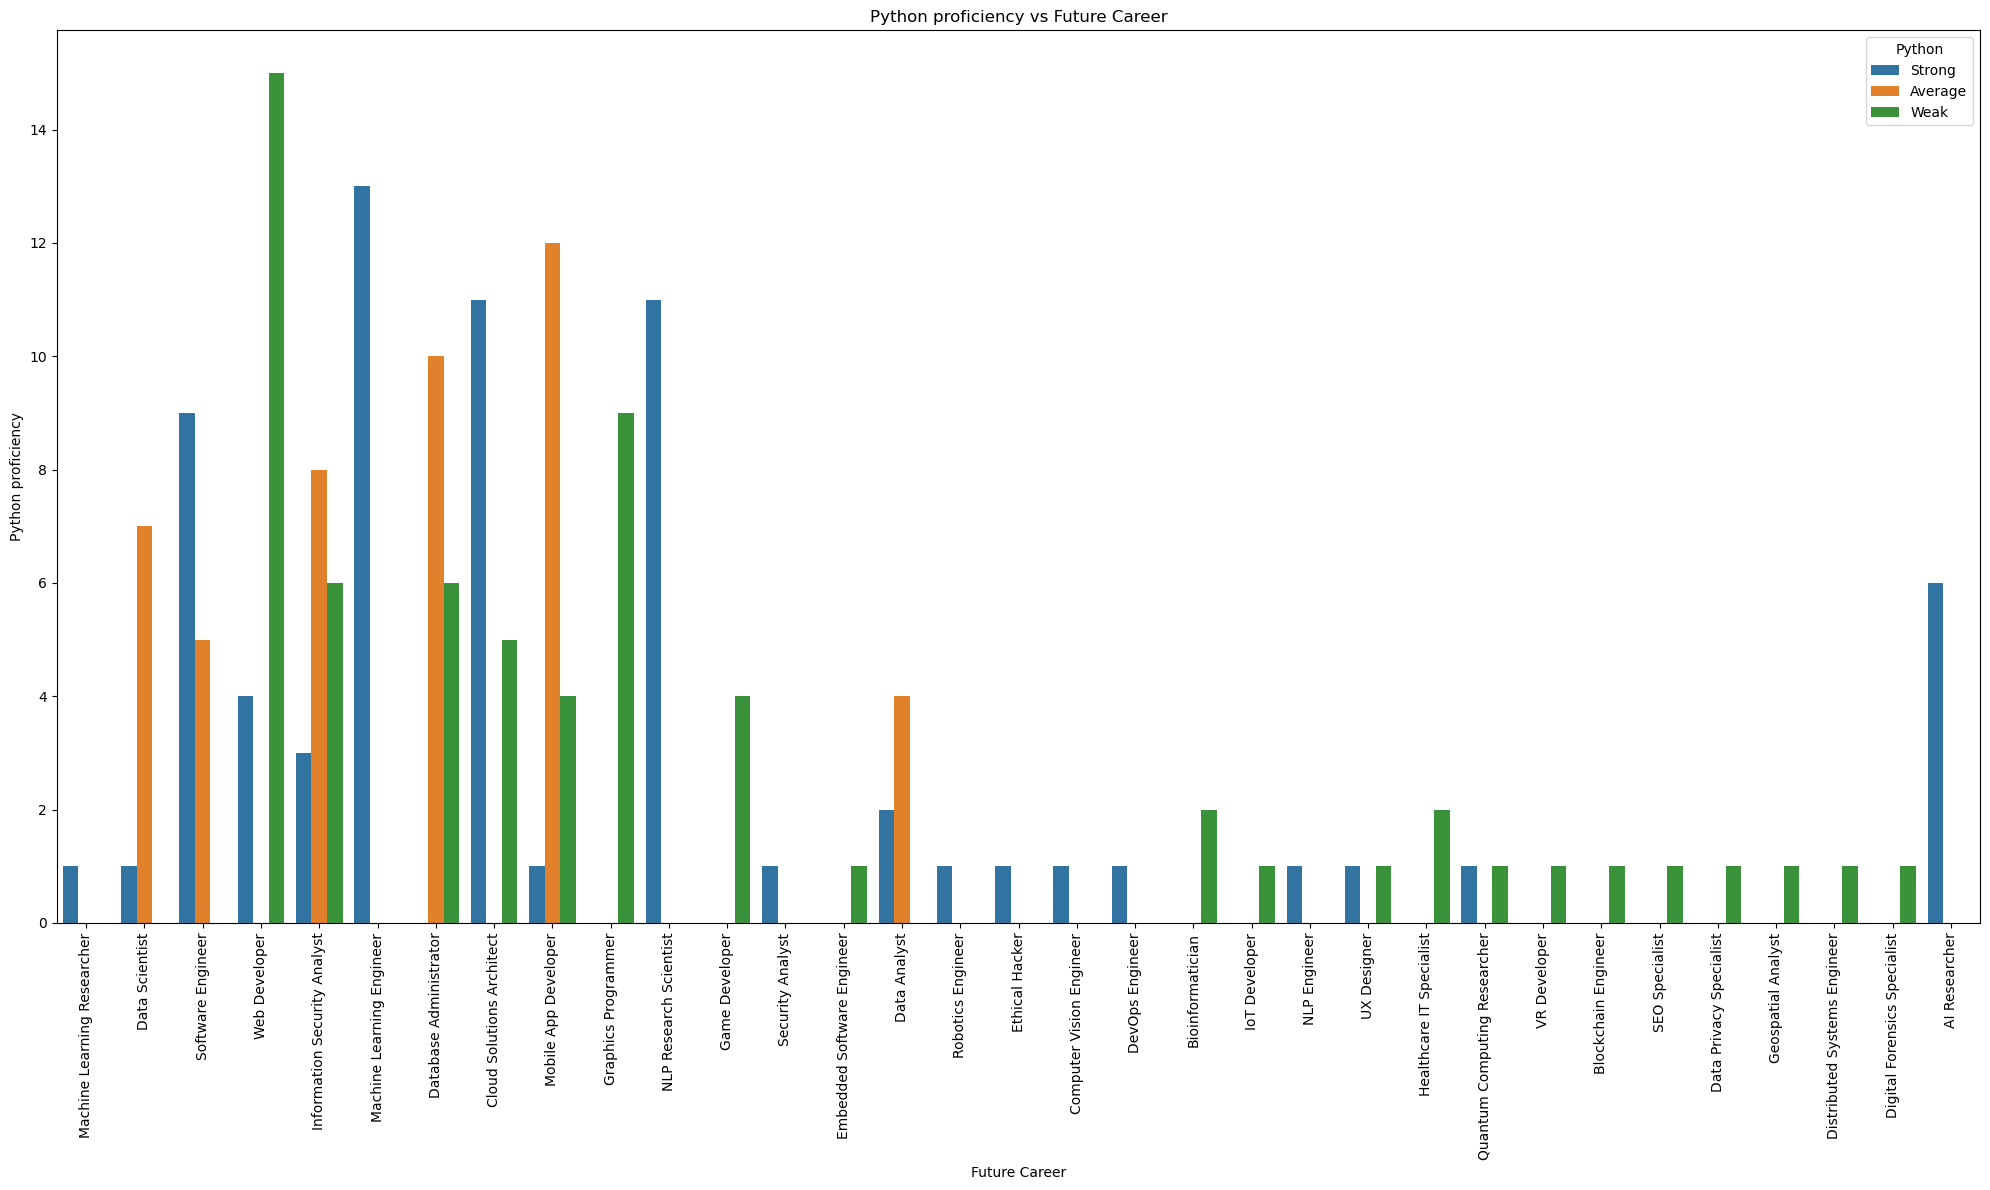

In [14]:
#Python proficiency vs Future Career
plt.figure(figsize=(20,12))
sns.countplot(data=df, x='Future Career', hue='Python')
plt.title('Python proficiency vs Future Career')
plt.xticks(rotation=90)
plt.xlabel('Future Career')
plt.ylabel('Python proficiency')
plt.tight_layout()
plt.show()

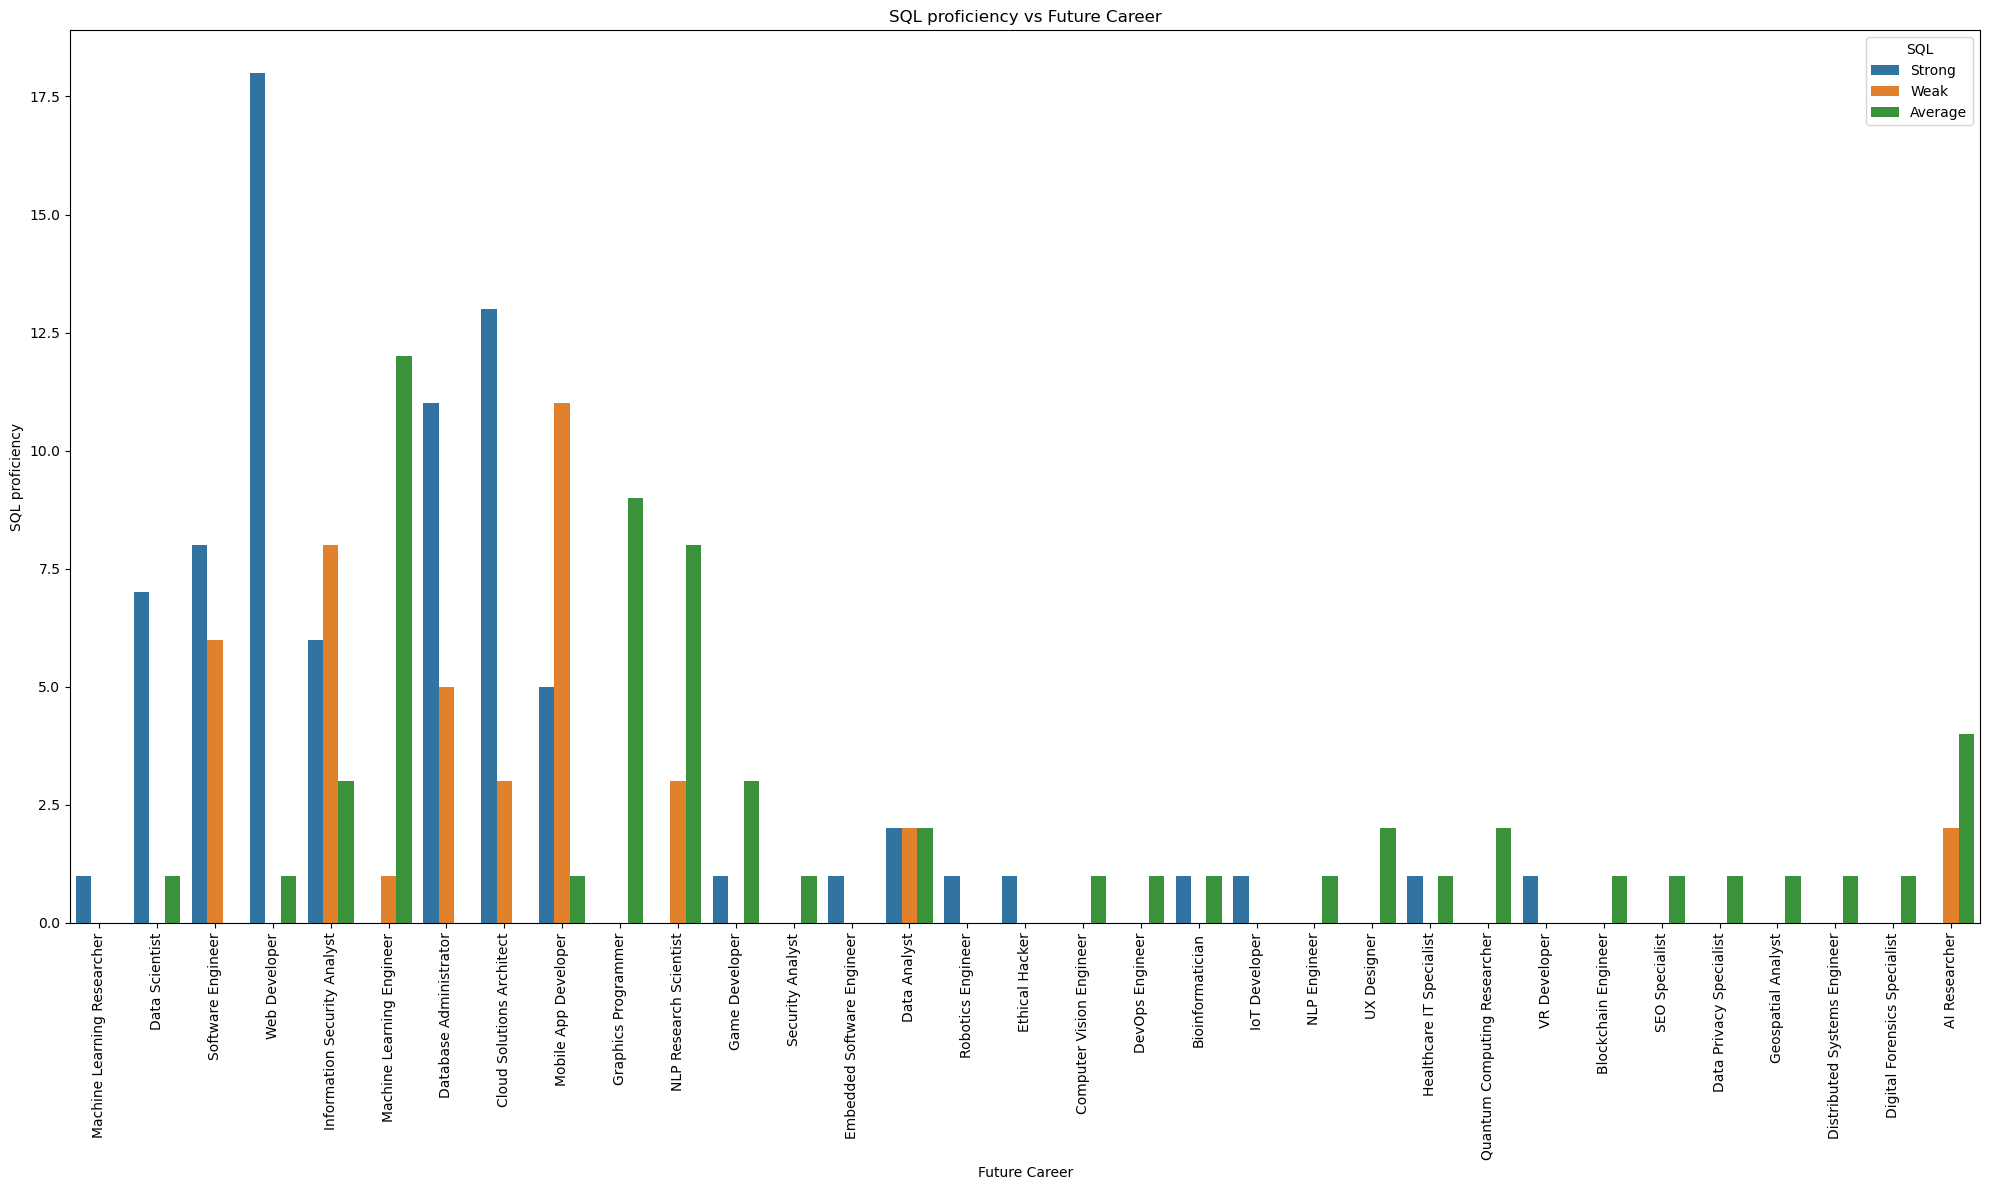

In [15]:
#SQL proficiency vs Future Career
plt.figure(figsize=(20,12))
sns.countplot(data=df, x='Future Career', hue='SQL')
plt.title('SQL proficiency vs Future Career')
plt.xticks(rotation=90)
plt.xlabel('Future Career')
plt.ylabel('SQL proficiency')
plt.tight_layout()
plt.show()

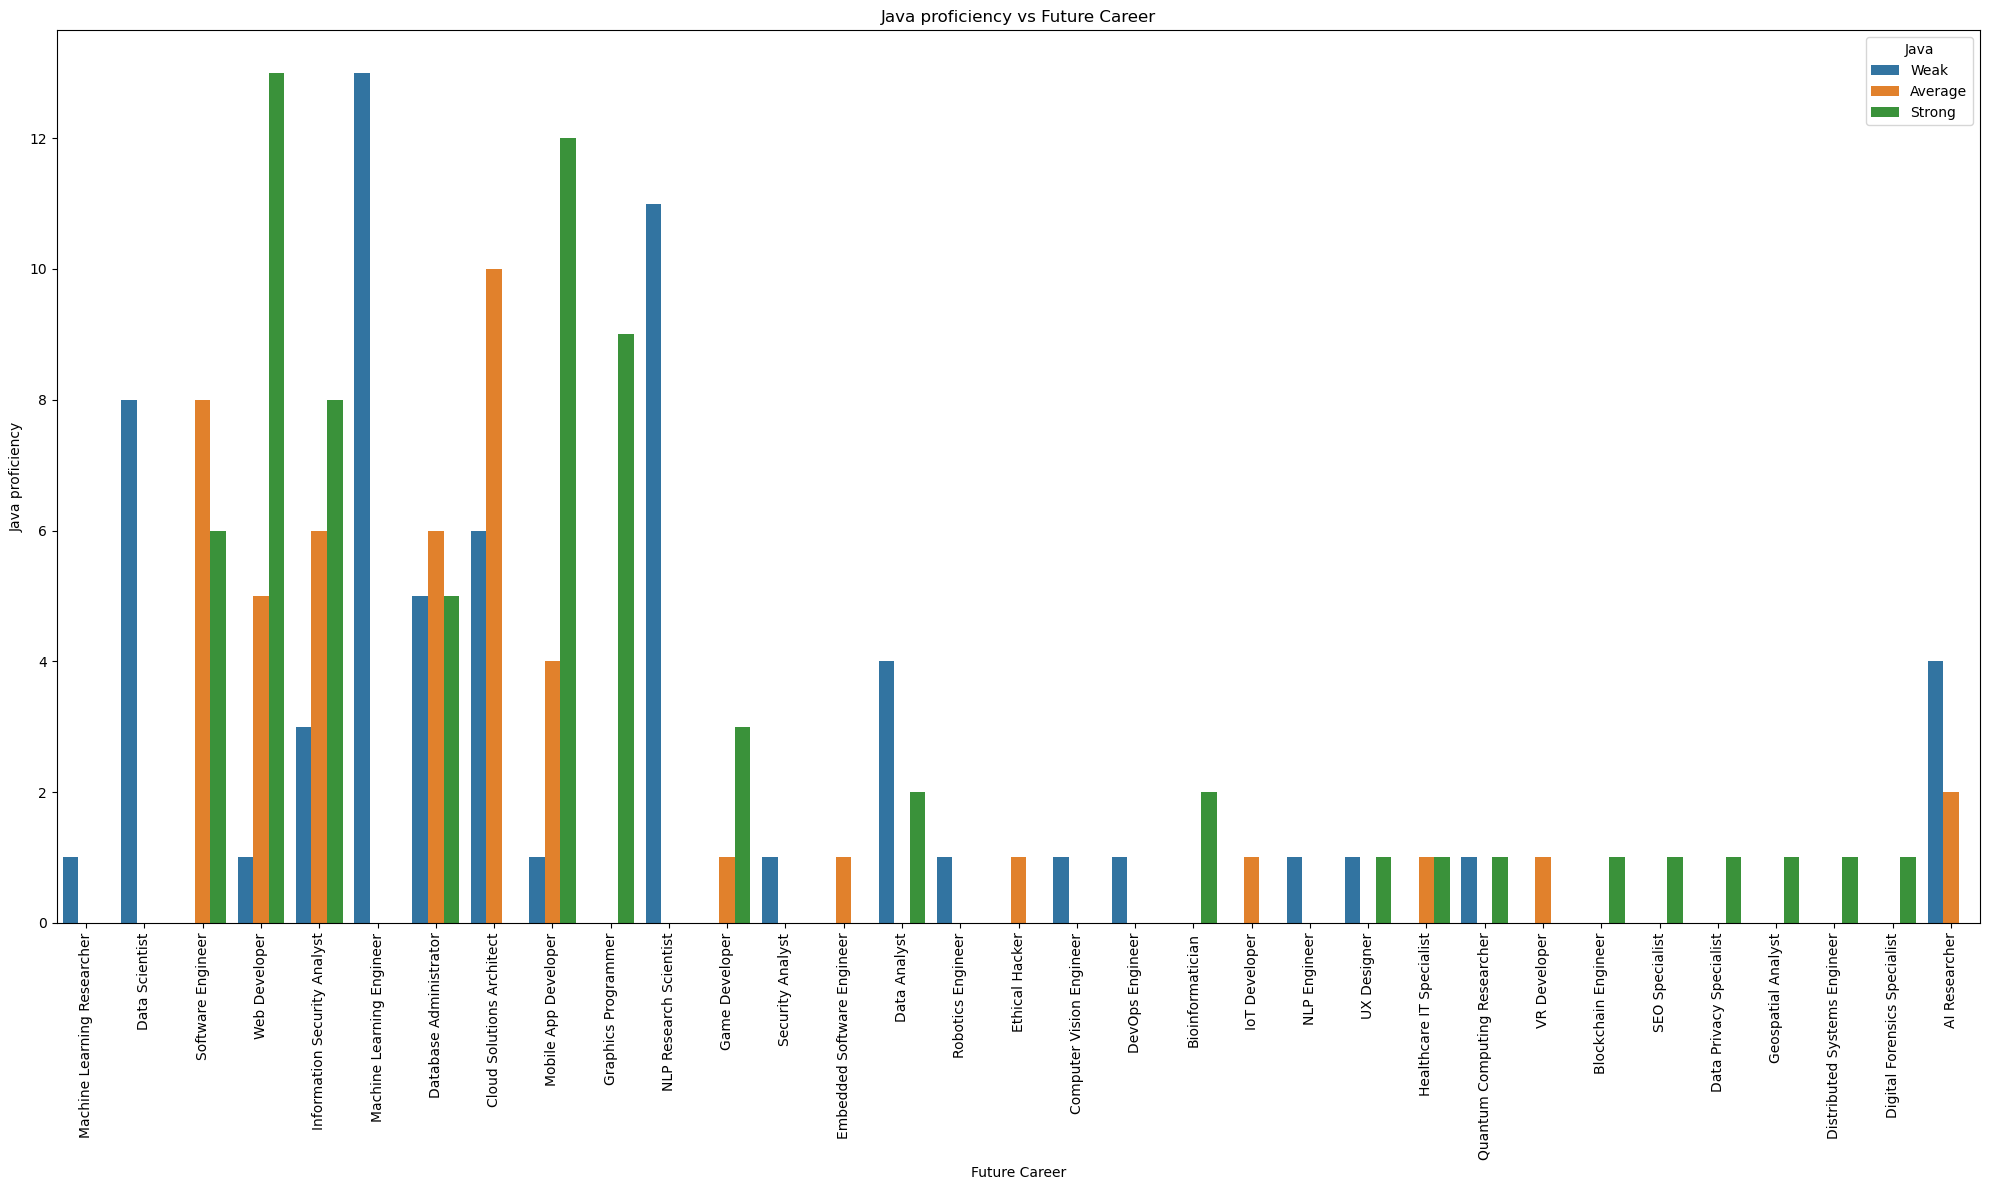

In [16]:
#Java proficiency vs Future Career
plt.figure(figsize=(20,12))
sns.countplot(data=df, x='Future Career', hue='Java')
plt.title('Java proficiency vs Future Career')
plt.xticks(rotation=90)
plt.xlabel('Future Career')
plt.ylabel('Java proficiency')
plt.tight_layout()
plt.show()

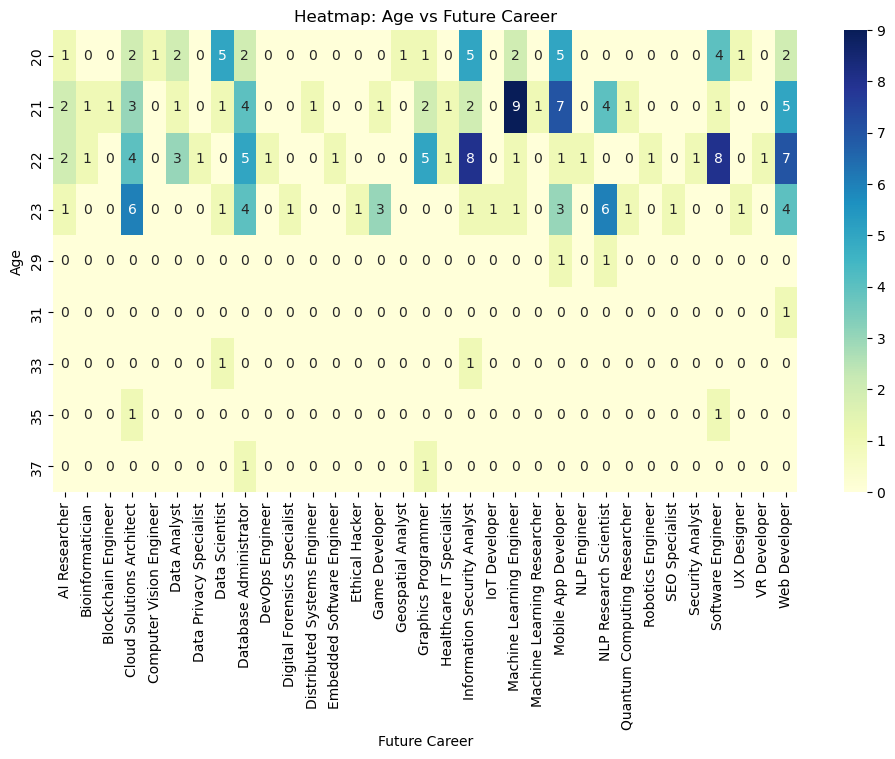

In [17]:
#Age vs Future Career
pivot_table = df.pivot_table(index='Age', columns='Future Career', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Age vs Future Career')
plt.xlabel('Future Career')
plt.ylabel('Age')
plt.show()

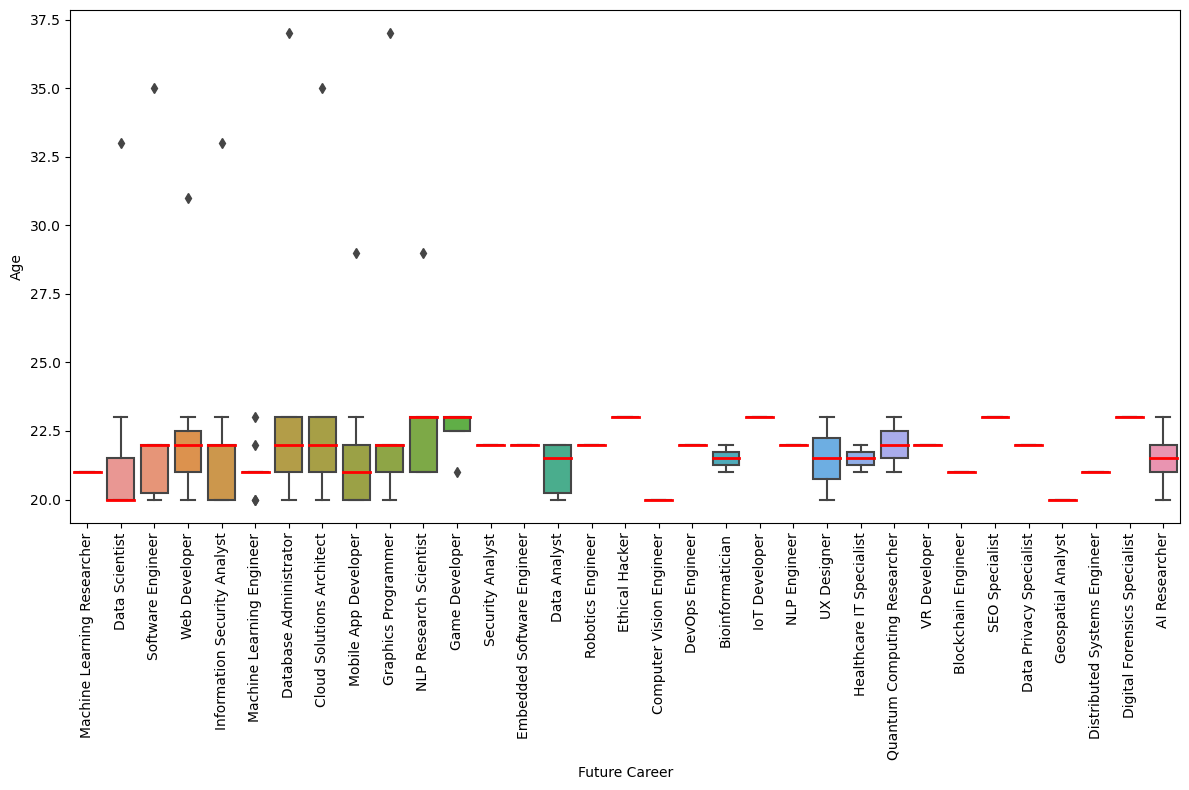

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Future Career', y='Age', data=df, medianprops=dict(color='red', linewidth=2))
plt.xlabel('Future Career')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

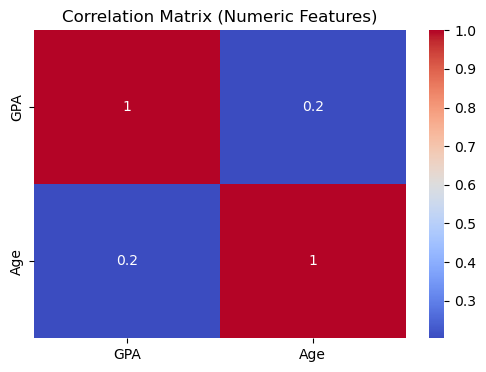

In [19]:
#Plotting a correlation heatmap for numerical features

numeric_df = df[['GPA', 'Age']]

# If Python/SQL/Java are ordinal (e.g., Beginner=1, Intermediate=2...), include them too
# If they're strings, convert them to ordered levels before correlation

plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

What I infer from this heatmap is Age & GPA are not highly correlated. If Age increases, GPA slightly increases (0.2 times), but not in a significant way.

### Step 5: Data Cleaning and Preprocessing

In [20]:
#Identifying Missing Values
df.isnull().sum()

Student ID           0
Name                 0
Gender               0
Age                  0
GPA                  0
Major                0
Interested Domain    0
Projects             0
Future Career        0
Python               0
SQL                  0
Java                 0
dtype: int64

This step was already performed before but just to maintain consistency and keep everything under their respective headings, I have again performed this analysis.

In [21]:
#Dropping columns which are not useful just by visual analysis
df.drop(['Student ID', 'Name'], axis=1, inplace=True)

"Student ID" and "Name" are two columns which add no real values when we are trying to figure out the future career of students, hence just by visual analysis they can be dropped. I have done inplace=True, because this is memory efficient and I am confident I don't need these columns for my analysis.

In [22]:
#Checking how the dataset looks now
df.head()

,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


The irrelevant columns have been dropped after a visual analysis (If there were more columns in the dataset, PCA would be required to determine which columns are important and which are less important).

In [23]:
#Feature Engineering
#Part1 - Ordinal encoding for all the skill columns (Python, SQL, Java)
skill_map = {"Weak":0, "Average":1, "Strong":2}
df['Python'] = df['Python'].map(skill_map)
df['SQL'] = df['SQL'].map(skill_map)
df['Java'] = df['Java'].map(skill_map)

df.head()

,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,2,2,0
1,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,1,2,0
2,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,2,2,1
3,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,0,2,2
4,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,1,0,2


This is just basic mapping, converting categorical variables to numeric for analysis, but this specific method is called ordinal encoding, because I am deciding which variable be put to 0,1 and 2 on the basis of rank. (Weak < Average < Strong)

In [24]:
#Part2 - One-hot encoding for the features
df = pd.get_dummies(df, columns=['Gender', 'Major', 'Interested Domain', 'Projects'], drop_first=True, dtype=int)

df.head()

,Age,GPA,Future Career,Python,SQL,Java,Gender_Male,Interested Domain_Bioinformatics,Interested Domain_Biomedical Computing,Interested Domain_Blockchain Technology,...,Projects_Smart Home Automation,Projects_Social Media Platform,Projects_Statistical Analysis,Projects_Usability Testing,Projects_User Experience Researcher,Projects_Virtual Reality Development,Projects_Web Application Development,Projects_iOS App,Projects_iOS App Development,Projects_iOS Game
0,21,3.5,Machine Learning Researcher,2,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,3.2,Data Scientist,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,3.8,Software Engineer,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,3.7,Web Developer,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,3.4,Information Security Analyst,1,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This is how the dataset looks like after one-hot encoding. Two important things - 1) why do we do drop_first=True? This is to reduce multicollinearity of columns. 2) "Major" column contains only one variable, which is computer science, so what happens to it in this case? Since it just has one unique value, it will automatically get dropped after performing one-hot encoding, lets test it out by printing the current info of the dataset.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 97 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Age                                               180 non-null    int64  
 1   GPA                                               180 non-null    float64
 2   Future Career                                     180 non-null    object 
 3   Python                                            180 non-null    int64  
 4   SQL                                               180 non-null    int64  
 5   Java                                              180 non-null    int64  
 6   Gender_Male                                       180 non-null    int32  
 7   Interested Domain_Bioinformatics                  180 non-null    int32  
 8   Interested Domain_Biomedical Computing            180 non-null    int32  
 9   Interested Domain_Blo

As visible, "Major" column has been dropped. Now why did this happen, because I did 'drop_first=True' during one-hot encoding. As stated previously drop_first=True reduces multicollinearity and creates n-1 columns (where n is the number of features), so for example if gender contains "Male" and " Female", normally two columns will get created "Gender_Male", "Gender_Female" but this is not ideal, because this leads to multicollinearity, but if we do drop_first=True, then first column will be dropped (alphabetically), so according to the formula, there are two features, so n=2, so 2-1 = 1, hence 1 new column will be created, let's say Gender_Female. Applying the same logic to "Major" column which just contains one variable - Computer Science, therefore n=1, so 1-1=0, hence no new columns created, hence "Major" column is dropped.

#### Multicolinearity - one column is a linear combination of others

In [26]:
#Part3 - Label Encoder for the target column
le = LabelEncoder()
df['Future Career'] = le.fit_transform(df['Future Career'])

df.head()

,Age,GPA,Future Career,Python,SQL,Java,Gender_Male,Interested Domain_Bioinformatics,Interested Domain_Biomedical Computing,Interested Domain_Blockchain Technology,...,Projects_Smart Home Automation,Projects_Social Media Platform,Projects_Statistical Analysis,Projects_Usability Testing,Projects_User Experience Researcher,Projects_Virtual Reality Development,Projects_Web Application Development,Projects_iOS App,Projects_iOS App Development,Projects_iOS Game
0,21,3.5,21,2,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,3.2,7,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,3.8,29,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,3.7,32,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,3.4,18,1,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Save label mapping for reference (I think an important and really good step)
career_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Target class mapping:", career_mapping)

Target class mapping: {'AI Researcher': 0, 'Bioinformatician': 1, 'Blockchain Engineer': 2, 'Cloud Solutions Architect': 3, 'Computer Vision Engineer': 4, 'Data Analyst': 5, 'Data Privacy Specialist': 6, 'Data Scientist': 7, 'Database Administrator': 8, 'DevOps Engineer': 9, 'Digital Forensics Specialist': 10, 'Distributed Systems Engineer': 11, 'Embedded Software Engineer': 12, 'Ethical Hacker': 13, 'Game Developer': 14, 'Geospatial Analyst': 15, 'Graphics Programmer': 16, 'Healthcare IT Specialist': 17, 'Information Security Analyst': 18, 'IoT Developer': 19, 'Machine Learning Engineer': 20, 'Machine Learning Researcher': 21, 'Mobile App Developer': 22, 'NLP Engineer': 23, 'NLP Research Scientist': 24, 'Quantum Computing Researcher': 25, 'Robotics Engineer': 26, 'SEO Specialist': 27, 'Security Analyst': 28, 'Software Engineer': 29, 'UX Designer': 30, 'VR Developer': 31, 'Web Developer': 32}


This step, although not required, is a highly recommended and excellent practice for interpretability. At the end, once the model is trained and starts making predictions, it will output numerical values like 1,2,3 etc. which would make 0 sense if the number of classes are very great (like in our case). Hence a convenient lookup table which translates these numerical predictions to categorical labels is crucial for understanding and reporting the results of our model. 

In [29]:
#Saving the cleaned file to a separate folder to revisit later (if it helps)
df.to_csv(r"D:/Projects/career-counsellor-ml/data/processed/processed_data.csv", index=False)

### Step 6: Train, Test & Split | SMOTE

In [31]:
#Split into X and y
X = df.drop('Future Career', axis=1)
y = df['Future Career']

In [32]:
X.head()

,Age,GPA,Python,SQL,Java,Gender_Male,Interested Domain_Bioinformatics,Interested Domain_Biomedical Computing,Interested Domain_Blockchain Technology,Interested Domain_Cloud Computing,...,Projects_Smart Home Automation,Projects_Social Media Platform,Projects_Statistical Analysis,Projects_Usability Testing,Projects_User Experience Researcher,Projects_Virtual Reality Development,Projects_Web Application Development,Projects_iOS App,Projects_iOS App Development,Projects_iOS Game
0,21,3.5,2,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,3.2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,3.8,2,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,3.7,0,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,3.4,1,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y.head()

0    21
1     7
2    29
3    32
4    18
Name: Future Career, dtype: int32

In [37]:
#Train, Test and Split
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

So ideally, now the train_test_split function was to be implemented, but as soon as I implemented that function (above cell), I faced a ValueError, stating - *ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2*. That is why I commented the above cell. Now why did this error occur? This is because of the parameter **stratify**. What stratify does is, it maintains the ratio of the target class in both training and testing data (more on it in the Insights_Q&A docs). So now if a class only has 1 variable, it is impossible to have the same distribution in both training and testing dataset, therefore this error occured.

There are a few methods to deal with this, but the one I am going with is to club all those classes which have a count fewer than 2, and create a new category called "Other".

In [38]:
#starting with transforming y
print(y.value_counts())

Future Career
32    19
18    17
22    17
8     16
3     16
29    14
20    13
24    11
16     9
7      8
0      6
5      6
14     4
30     2
1      2
17     2
25     2
15     1
6      1
27     1
11     1
2      1
31     1
10     1
21     1
23     1
19     1
9      1
4      1
26     1
12     1
28     1
13     1
Name: count, dtype: int64


In [40]:
counts = y.value_counts()
rare_classes = counts[counts < 2].index
print(rare_classes)

Index([15, 6, 27, 11, 2, 31, 10, 21, 23, 19, 9, 4, 26, 12, 28, 13], dtype='int32', name='Future Career')


In [41]:
y = y.apply(lambda x: 'Other' if x in rare_classes else x)

print(y.value_counts())

Future Career
32       19
18       17
22       17
Other    16
8        16
3        16
29       14
20       13
24       11
16        9
7         8
5         6
0         6
14        4
1         2
30        2
17        2
25        2
Name: count, dtype: int64


In [58]:
#Now this other needs to be converted to a numeric value
y = y.replace('Other', 33)

y.value_counts()

Future Career
32    19
18    17
22    17
33    16
8     16
3     16
29    14
20    13
24    11
16     9
7      8
5      6
0      6
14     4
1      2
30     2
17     2
25     2
Name: count, dtype: int64

In [59]:
#Now that the y variable is all set, time to apply train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [63]:
print("Shape of X_train :", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (144, 96)
Shape of X_test : (36, 96)
Shape of y_train : (144,)
Shape of y_test : (36,)
